# Table of contents
0. Introduction
   
1. Load the dataset  
   1.1. Convert to Sequential dataset & One-hot Encoding

4. CNN Training

# 0. Introduction

**Dataset**  
* diabetes(당뇨병) | [Download csv file](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* 당뇨병 데이터에 대해서 CNN을 사용하여 Classification 진행한다.
* 그리고 Pre-trained Learning을 사용한다.

# 1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# dataset의 shape, columns 확인
print(f"Shape  : {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape  : (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
# features description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 당뇨 유무
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| Outcome                   | 당뇨 유무\n'

In [5]:
# Check the missing value

# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")

# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# sol3. 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): 
    print("There are no missing values.")
else:
    print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                   

In [6]:
# missing value 처리하기
# null이 존재한다면 자동으로 처리하는 if statement를 작성 가능.
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함.
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

There are no missing values.


In [7]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

# 여기서 Glucose, BloodPressure, ... 등의 min value가 0인 것에 의문을 가짐

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


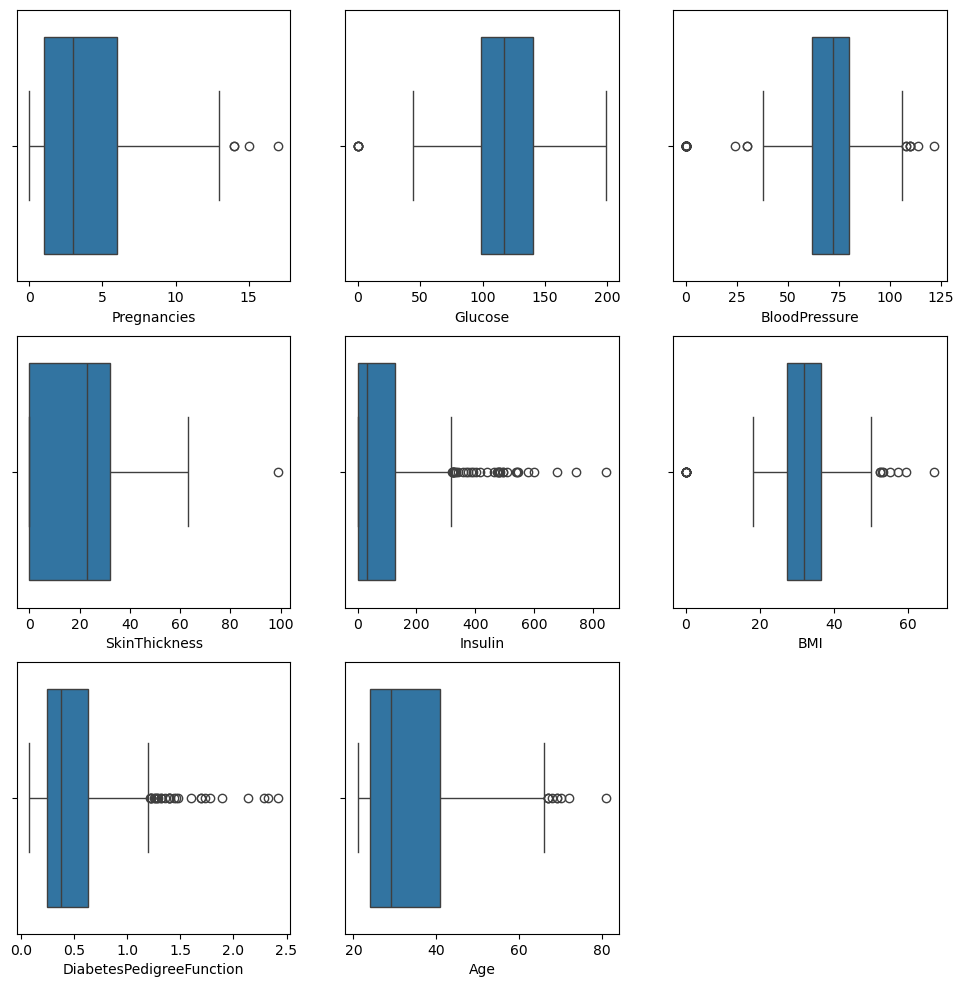

In [8]:
# 각 feature의 distribution 확인 - boxplot

# 각 column에 대한 boxplot plotting
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 3
idx = 1

for column in df.columns[:-1]:
    # 이 아래로는 각 subplot에 개별로 적용됨
    figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
    sns.boxplot(data=df, x=column)
    idx += 1

plt.show()

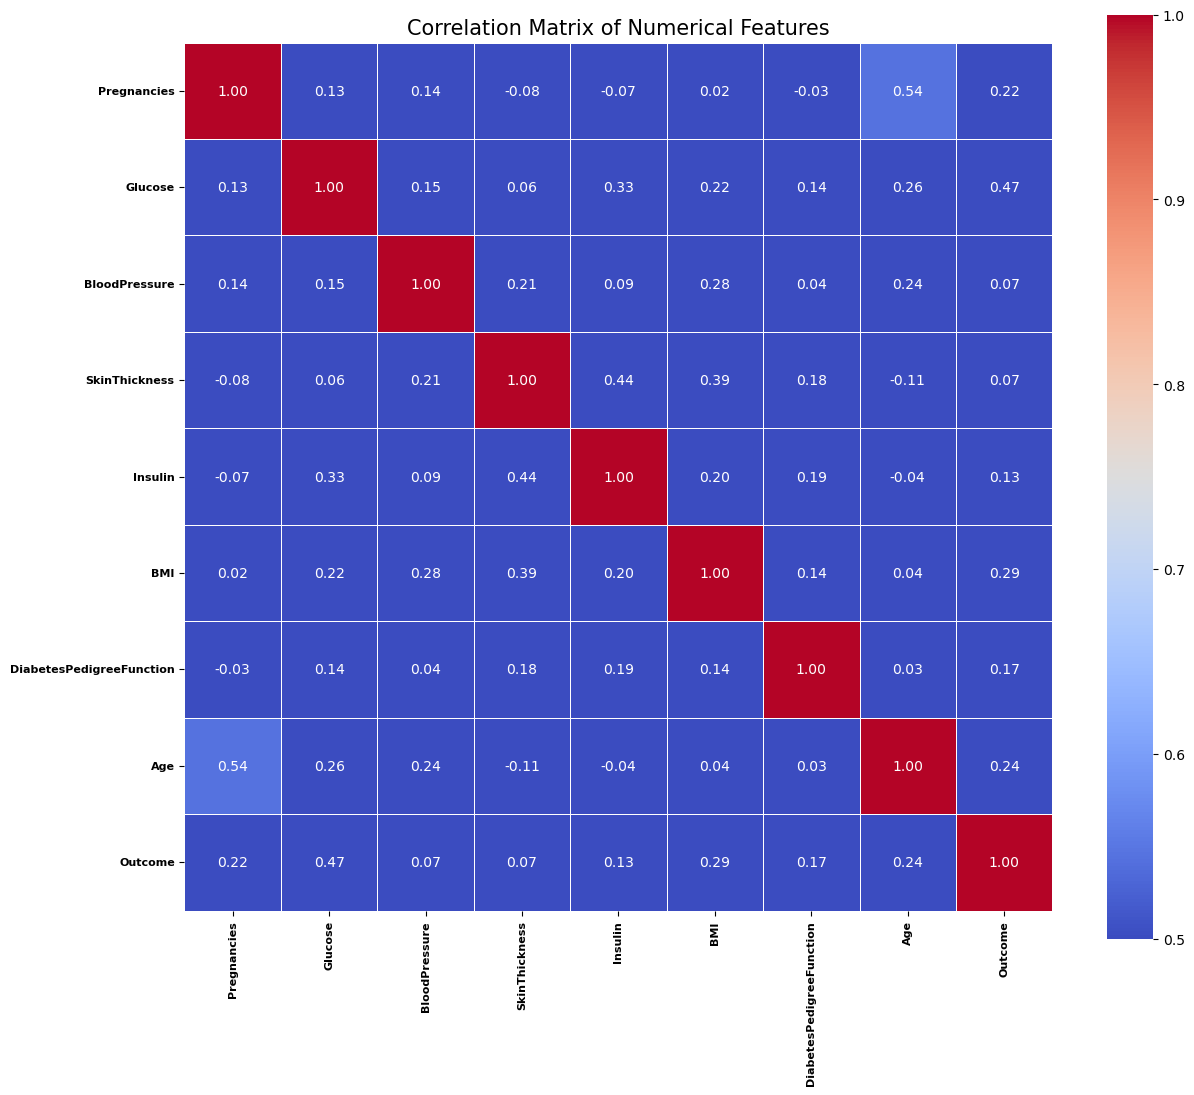

In [9]:
# SkinThicness와 Insulin feature를 제거해도 되는 지의 타당성 검증
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

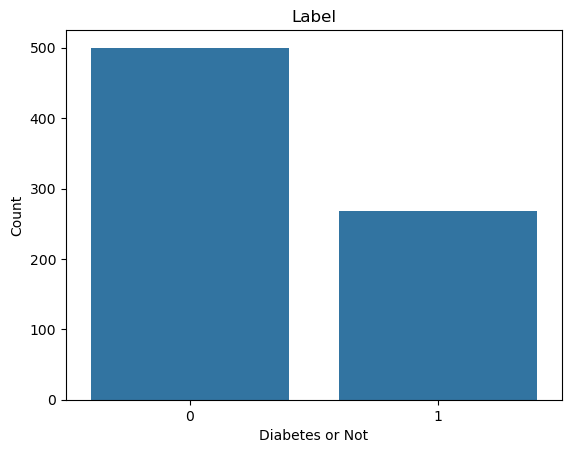

In [10]:
sns.countplot(data=df, x='Outcome')
plt.xlabel('Diabetes or Not')
plt.ylabel('Count')
plt.title('Label')
plt.show()

In [11]:
# Label의 class 종류 및 count 확인
labels = np.unique(df['Outcome'], return_counts=True)
print(labels)

# 해당 task에서 중요한 것은 positive class를 찾아내는 것이다.
# 그런데 현재 positive class sample의 수가 적은 imbalanced data라서 학습이 적게 될 것이 우려됨
# 일단 그대로 진행하고, 문제가 있으면 추가적인 작업을 진행하겠음
# 해당 주석이 보인다면, imbalanced data에 의한 문제가 없다는 것으로 해석하면 됨

(array([0, 1]), array([500, 268]))


In [12]:
# # Check the correlations - sol2. pairplot
# sns.pairplot(data=df,
#              vars=df.columns,
#              hue='Outcome')
# plt.show()

In [13]:
# Split to X, y
X = df.drop(['Outcome'],axis=1).to_numpy()
y = df['Outcome'].to_numpy()

In [14]:
# Split to train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

print(f"X_train.head(): \n{X_train[:5]}")
print(f"y_train.head(): \n{y_train[:5]}")

X_train: Shape (691, 8) 
X_test:  Shape (77, 8)
y_train: Shape (691,) 
y_test:  Shape (77,)
X_train.head(): 
[[  1.    113.     64.     35.      0.     33.6     0.543  21.   ]
 [  1.     88.     30.     42.     99.     55.      0.496  26.   ]
 [  1.    146.     56.      0.      0.     29.7     0.564  29.   ]
 [  2.    155.     74.     17.     96.     26.6     0.433  27.   ]
 [  6.    129.     90.      7.    326.     19.6     0.582  60.   ]]
y_train.head(): 
[1 1 0 1 0]


In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled.head(): \n{X_train_scaled[:5]}")

X_train_scaled.head(): 
[[-0.8500507  -0.24307805 -0.28895662  0.91276597 -0.70884511  0.21606932
   0.2110448  -1.05618828]
 [-0.8500507  -1.02519267 -2.12028839  1.356133    0.1738275   3.00752781
   0.0685775  -0.63068332]
 [-0.8500507   0.78931324 -0.71985821 -1.30406923 -0.70884511 -0.29265443
   0.27470041 -0.37538035]
 [-0.55443669  1.0708745   0.24967037 -0.22732071  0.14707984 -0.69702459
  -0.12238932 -0.54558233]
 [ 0.62801934  0.2574753   1.11147355 -0.86070219  2.19773339 -1.61011849
   0.32926235  2.26275038]]


## 1.1. Convert to Sequential dataset & One-hot Encoding

In [16]:
# Sequential dataset 만들기(1)
from collections import Counter

def split_sequences_classification_majority(data, labels, n_steps):
    """
    비연속 데이터셋을 일정한 길이의 연속적인 시퀀스로 변환하는 함수
    window에서 다수를 차지하는 label로 결정
    
    Args:
    data: 원본 데이터 (리스트 또는 배열)
    labels: 각 데이터에 해당하는 클래스 라벨 (리스트 또는 배열)
    n_steps: 시퀀스의 길이 (정수)
    
    Returns:
    X: 입력 시퀀스
    y: 해당 시퀀스에 대한 다수 라벨
    """
    X, y = [], []
    
    for i in range(len(data) - n_steps + 1):
        # 시퀀스 추출
        seq_x = data[i:i + n_steps]
        seq_labels = labels[i:i + n_steps]
        
        # 시퀀스의 라벨 중 가장 빈번한 라벨을 선택 (다수결)
        most_common_label = Counter(seq_labels).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [17]:
# Sequential dataset 만들기(2)
n_steps = 3

X_train_seq, y_train_seq = split_sequences_classification_majority(X_train_scaled, 
                                                                   y_train, 
                                                                   n_steps)
X_test_seq, y_test_seq = split_sequences_classification_majority(X_test_scaled, 
                                                                 y_test, 
                                                                 n_steps)

print(f"X_train_seq: Shape {X_train_seq.shape}")
print(f"y_train_seq: Shape {y_train_seq.shape}")
print()
print(f"X_train_seq.head(): \n{X_train_seq[:5]}")
print(f"y_train_seq.head(): \n{y_train_seq[:5]}")

n_features = X_train_seq.shape[2]

X_train_seq: Shape (689, 3, 8)
y_train_seq: Shape (689,)

X_train_seq.head(): 
[[[-0.8500507  -0.24307805 -0.28895662  0.91276597 -0.70884511
    0.21606932  0.2110448  -1.05618828]
  [-0.8500507  -1.02519267 -2.12028839  1.356133    0.1738275
    3.00752781  0.0685775  -0.63068332]
  [-0.8500507   0.78931324 -0.71985821 -1.30406923 -0.70884511
   -0.29265443  0.27470041 -0.37538035]]

 [[-0.8500507  -1.02519267 -2.12028839  1.356133    0.1738275
    3.00752781  0.0685775  -0.63068332]
  [-0.8500507   0.78931324 -0.71985821 -1.30406923 -0.70884511
   -0.29265443  0.27470041 -0.37538035]
  [-0.55443669  1.0708745   0.24967037 -0.22732071  0.14707984
   -0.69702459 -0.12238932 -0.54558233]]

 [[-0.8500507   0.78931324 -0.71985821 -1.30406923 -0.70884511
   -0.29265443  0.27470041 -0.37538035]
  [-0.55443669  1.0708745   0.24967037 -0.22732071  0.14707984
   -0.69702459 -0.12238932 -0.54558233]
  [ 0.62801934  0.2574753   1.11147355 -0.86070219  2.19773339
   -1.61011849  0.32926235  2.26

In [18]:
# one-hot encoding
from keras.utils import to_categorical

y_train_seq_hot = to_categorical(y_train_seq)
y_test_seq_hot = to_categorical(y_test_seq)

print("==== one-hot encoded ====")
print(f"y_train_seq_hot.shape: {y_train_seq_hot.shape}")
print(f"y_test_seq_hot.shape: {y_test_seq_hot.shape}")

2024-09-30 22:49:10.875039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


==== one-hot encoded ====
y_train_seq_hot.shape: (689, 2)
y_test_seq_hot.shape: (75, 2)


In [19]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=16,
                              kernel_size=3,
                              strides=1,
                              activation='relu',
                              input_shape=(n_steps, n_features),
                              name='conv1'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=16,
                             activation='relu',
                             kernel_regularizer=regularizers.l2(0.01),
                             name='dense1'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dense(units=64,
#                              activation='relu',
#                              kernel_regularizer=regularizers.l2(0.01),
#                              name='dense2'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=2,
                             activation='sigmoid',
                             name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 1, 16)             400       
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense1 (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 2)                 34        
                                                                 
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________


2024-09-30 22:49:13.258576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_seq, y_train_seq_hot,
                    validation_split=0.1,
                    batch_size=32,
                    verbose=2,
                    epochs=50)

Epoch 1/50
20/20 - 1s - loss: 0.8103 - accuracy: 0.6774 - val_loss: 0.7646 - val_accuracy: 0.7826 - 517ms/epoch - 26ms/step
Epoch 2/50
20/20 - 0s - loss: 0.7677 - accuracy: 0.6968 - val_loss: 0.7058 - val_accuracy: 0.8696 - 40ms/epoch - 2ms/step
Epoch 3/50
20/20 - 0s - loss: 0.7307 - accuracy: 0.7065 - val_loss: 0.6551 - val_accuracy: 0.9130 - 39ms/epoch - 2ms/step
Epoch 4/50
20/20 - 0s - loss: 0.6983 - accuracy: 0.7081 - val_loss: 0.6128 - val_accuracy: 0.9130 - 38ms/epoch - 2ms/step
Epoch 5/50
20/20 - 0s - loss: 0.6703 - accuracy: 0.7113 - val_loss: 0.5785 - val_accuracy: 0.9130 - 38ms/epoch - 2ms/step
Epoch 6/50
20/20 - 0s - loss: 0.6458 - accuracy: 0.7113 - val_loss: 0.5504 - val_accuracy: 0.8986 - 39ms/epoch - 2ms/step
Epoch 7/50
20/20 - 0s - loss: 0.6252 - accuracy: 0.7145 - val_loss: 0.5277 - val_accuracy: 0.9130 - 37ms/epoch - 2ms/step
Epoch 8/50
20/20 - 0s - loss: 0.6075 - accuracy: 0.7177 - val_loss: 0.5130 - val_accuracy: 0.8986 - 38ms/epoch - 2ms/step
Epoch 9/50
20/20 - 0s 

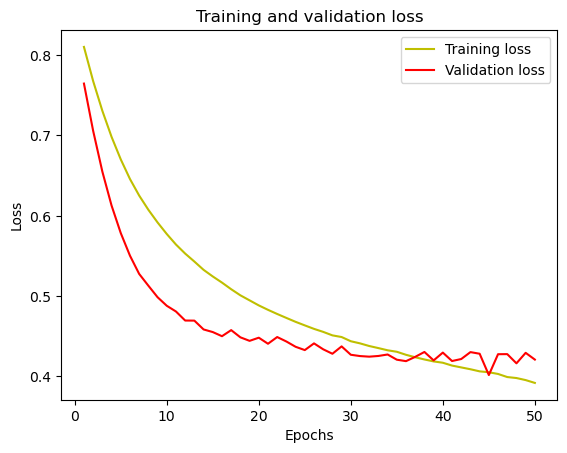

In [21]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

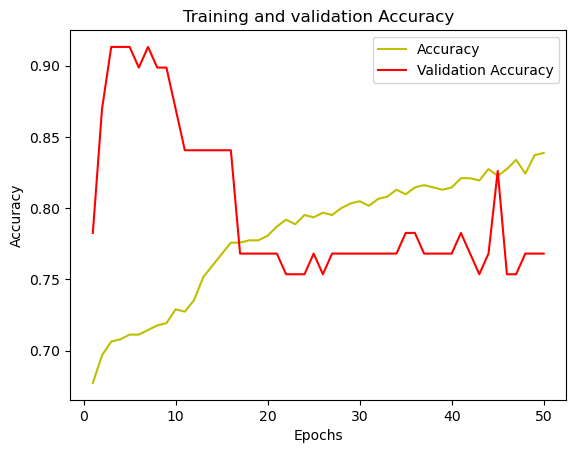

In [22]:
# Epoch에 따른 Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# evaluate the model - train
model.evaluate(X_train_seq, y_train_seq_hot)

22/22 [==============================] - 0s 769us/step - loss: 0.3905 - accuracy: 0.8302


[0.39047694206237793, 0.8301886916160583]

In [24]:
# evaluate the model - test
model.evaluate(X_test_seq, y_test_seq_hot)

3/3 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7333


[0.5309101343154907, 0.7333333492279053]

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# classification report
y_pred = model.predict(X_test_seq)
print(f"y_pred.head() \n{y_pred[:5]}")

y_pred_class = np.argmax(y_pred, axis=1)
print(f"y_pred_class.head() \n{y_pred_class[:5]}")

y_test_class = np.argmax(y_test_seq_hot, axis=1)
print(f"y_test_class.head() \n{y_test_class[:5]}")

print()
print(classification_report(y_test_class, y_pred_class))

# print(confusion_matrix(y_test_class, y_pred_class))

3/3 [==============================] - 0s 1ms/step
y_pred.head() 
[[0.5599543  0.42937225]
 [0.43833393 0.55120987]
 [0.5776579  0.4389681 ]
 [0.96310645 0.02840883]
 [0.82061285 0.16707078]]
y_pred_class.head() 
[0 1 0 0 0]
y_test_class.head() 
[1 1 1 0 0]

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        57
           1       0.46      0.61      0.52        18

    accuracy                           0.73        75
   macro avg       0.66      0.69      0.67        75
weighted avg       0.77      0.73      0.74        75



Confusion Matrix


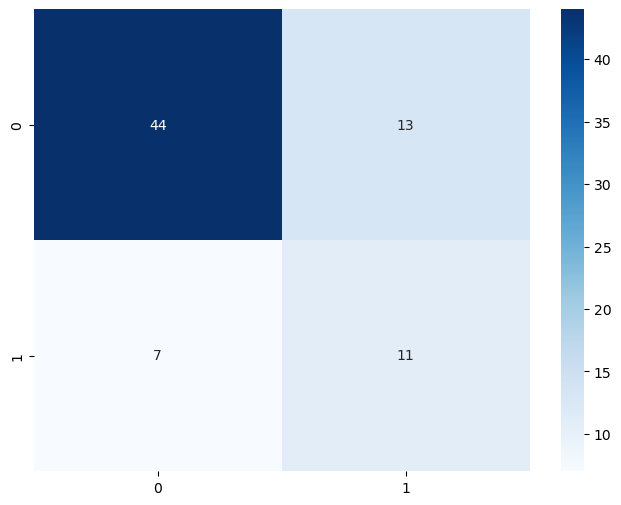

In [26]:
# confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test_class, y_pred_class)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [27]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

# 도메인 지식을 활용한 특성 공학

네, 도메인 지식을 활용하여 'glucose', 'bloodpressure', 'BMI', 'diabetes pedigree function', 'age' 사이에서 새로운 특징을 생성할 수 있습니다. 이러한 특징 공학은 모델이 복잡한 관계와 패턴을 더 잘 학습하도록 도울 수 있으며, 당뇨병 예측의 정확도를 향상시킬 수 있습니다. 아래에 각 변수들을 활용한 특징 공학 아이디어와 그 이유를 설명하겠습니다.

---

### 1. **연령대 구분 (Age Grouping)**

**설명**: 나이는 당뇨병 발생 위험에 큰 영향을 미칩니다. 연령대를 구분하여 나이와 당뇨병 간의 비선형 관계를 더 잘 포착할 수 있습니다.

**방법**:
- **연령대 범주화**: 나이를 특정 연령대로 구분합니다. 예를 들어, 20대, 30대, 40대 등으로 나눕니다.
- **이진 변수 생성**: 특정 나이 이상인지를 나타내는 변수 생성(예: '나이_50이상').

**이점**:
- 모델이 나이와 관련된 위험 패턴을 더 명확히 학습할 수 있습니다.
- 비선형 및 복잡한 관계를 포착하여 예측 성능 향상에 도움이 됩니다.

---

### 2. **BMI 범주화 및 변환 (BMI Categorization and Transformation)**

**설명**: BMI는 체중 상태를 나타내며, 비만은 당뇨병의 주요 위험 요인 중 하나입니다.

**방법**:
- **BMI 범주화**: BMI 값을 기준으로 저체중(<18.5), 정상(18.5–24.9), 과체중(25–29.9), 비만(≥30)으로 구분합니다.
- **로그 변환**: BMI 값에 로그 변환을 적용하여 이상치의 영향을 줄입니다.

**이점**:
- 비만 관련 위험을 더 명확히 반영하여 모델의 해석 가능성을 높입니다.
- 로그 변환을 통해 데이터의 분포를 안정화하고 모델의 성능을 향상시킵니다.

---

### 3. **혈당 수치 범주화 (Glucose Level Categorization)**

**설명**: 혈당 수치는 당뇨병 진단의 핵심 지표입니다.

**방법**:
- **임상 기준 적용**: 공복 혈당 수치를 기준으로 정상(<100 mg/dL), 공복혈당장애(100–125 mg/dL), 당뇨병(≥126 mg/dL)으로 범주화합니다.
- **이진 변수 생성**: 특정 기준 이상인지를 나타내는 변수 생성(예: '고혈당_여부').

**이점**:
- 임상적 의미를 반영하여 모델이 혈당 수치와 당뇨병 간의 관계를 더 잘 이해하도록 돕습니다.

---

### 4. **혈압 범주화 (Blood Pressure Categorization)**

**설명**: 고혈압은 당뇨병과 관련된 심혈관 질환의 위험 요인입니다.

**방법**:
- **혈압 수준 구분**: 정상 혈압(<120 mmHg), 전고혈압(120–139 mmHg), 고혈압(≥140 mmHg)으로 범주화합니다.
- **평균 동맥압(MAP) 계산**: \( \text{MAP} = \text{이완기 혈압} + \frac{1}{3} (\text{수축기 혈압} - \text{이완기 혈압}) \)을 사용하여 혈압의 전체적인 부담을 나타냅니다.

**이점**:
- 혈압과 당뇨병 간의 복잡한 상호작용을 모델이 학습할 수 있습니다.

---

### 5. **상호작용 특징 생성 (Interaction Features)**

**설명**: 두 개 이상의 변수 간의 상호작용을 반영하여 새로운 특징을 만듭니다.

**방법**:
- **BMI × 나이**: 나이와 BMI의 곱으로 새로운 변수를 생성합니다.
- **혈당 × BMI**: 혈당 수치와 BMI의 곱으로 새로운 변수를 만듭니다.
- **혈압 × 나이**: 혈압과 나이의 곱을 새로운 특징으로 사용합니다.

**이점**:
- 복합적인 위험 요인의 시너지 효과를 모델이 포착하여 예측력을 높입니다.

---

### 6. **유전적 요인과의 상호작용 (Interaction with Diabetes Pedigree Function)**

**설명**: Diabetes Pedigree Function은 가족력을 나타내며, 유전적 소인과 기타 요인의 상호작용을 고려할 수 있습니다.

**방법**:
- **Diabetes Pedigree Function × 나이**: 유전적 요인과 나이의 상호작용을 반영합니다.
- **Diabetes Pedigree Function × 혈당**: 유전적 소인과 혈당 수치의 관계를 나타냅니다.

**이점**:
- 개인의 유전적 위험과 환경적 요인의 복합적인 영향을 모델이 학습할 수 있습니다.

---

### 7. **건강 지수 생성 (Health Indices Creation)**

**설명**: 여러 변수를 결합하여 하나의 종합적인 건강 지수를 만듭니다.

**방법**:
- **대사 증후군 지수**: BMI, 혈압, 혈당 수치 등을 결합하여 대사 증후군의 위험도를 나타내는 지수를 생성합니다.
- **위험 점수 계산**: 각 변수에 가중치를 부여하여 합산합니다. 예를 들어, \( \text{Risk Score} = (0.5 \times \text{glucose}) + (0.3 \times \text{BMI}) + (0.2 \times \text{bloodpressure}) \).

**이점**:
- 종합적인 건강 상태를 하나의 지표로 나타내어 모델의 복잡성을 줄이고 성능을 향상시킵니다.

---

### 8. **비선형 변환 적용 (Applying Non-Linear Transformations)**

**설명**: 변수에 로그, 제곱근 등의 비선형 변환을 적용하여 분포를 정규화하고 이상치의 영향을 줄입니다.

**방법**:
- **로그 변환**: 'glucose', 'BMI' 등에 로그 변환을 적용합니다.
- **제곱근 변환**: 'bloodpressure' 등에 제곱근 변환을 적용합니다.

**이점**:
- 모델의 성능을 향상시키고 학습을 안정화합니다.

---

### 9. **다항 특징 생성 (Polynomial Features)**

**설명**: 변수의 제곱, 세제곱 등을 사용하여 비선형 관계를 모델링합니다.

**방법**:
- **제곱 항 추가**: 'glucose^2', 'BMI^2' 등과 같은 항을 추가합니다.
- **다항 회귀 적용**: 다항 회귀 모델을 사용하여 비선형성을 반영합니다.

**이점**:
- 변수와 타겟 변수 간의 복잡한 비선형 관계를 모델이 학습할 수 있습니다.

---

### 10. **특징 선택 및 차원 축소 (Feature Selection and Dimensionality Reduction)**

**설명**: 생성된 특징 중 중요한 것만 선택하여 모델의 복잡도를 관리합니다.

**방법**:
- **상관관계 분석**: 변수들 간의 상관관계를 분석하여 다중공선성을 줄입니다.
- **피처 중요도 평가**: 결정 트리나 랜덤 포레스트를 사용하여 특징의 중요도를 평가합니다.
- **주성분 분석(PCA)**: 차원 축소 기법을 적용하여 주요 정보만 유지합니다.

**이점**:
- 모델의 일반화 능력을 향상시키고 과적합을 방지합니다.

---

### **실제 예시 코드 (Python 기반)**

```python
import pandas as pd
import numpy as np

# 데이터 로드
data = pd.read_csv('diabetes.csv')

# 연령대 구분
data['Age_Group'] = pd.cut(data['age'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])

# BMI 범주화
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0,18.5,25,30,np.inf], labels=['Underweight','Normal','Overweight','Obese'])

# 혈당 수치 범주화
data['Glucose_Level'] = pd.cut(data['glucose'], bins=[0,99,125,np.inf], labels=['Normal','Prediabetes','Diabetes'])

# 혈압 범주화
data['BloodPressure_Level'] = pd.cut(data['bloodpressure'], bins=[0,79,89,np.inf], labels=['Normal','Prehypertension','Hypertension'])

# 상호작용 변수 생성
data['BMI_Age'] = data['BMI'] * data['age']
data['Glucose_BMI'] = data['glucose'] * data['BMI']
data['Pedigree_Age'] = data['diabetes_pedigree_function'] * data['age']

# 건강 지수 생성
data['Metabolic_Syndrome_Score'] = (
    (data['BMI'] >= 25).astype(int) +
    (data['bloodpressure'] >= 130).astype(int) +
    (data['glucose'] >= 100).astype(int)
)

# 비선형 변환 적용
data['Log_Glucose'] = np.log1p(data['glucose'])
data['Sqrt_BloodPressure'] = np.sqrt(data['bloodpressure'])

# 다항 특징 생성
data['BMI_Squared'] = data['BMI'] ** 2
data['Glucose_Squared'] = data['glucose'] ** 2

# 필요에 따라 결측치 처리 (예: 로그 변환 시 0 값 처리)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
```

---

### **주의 사항 및 추가 권장 사항**

- **의료적 해석 가능성 유지**: 생성된 특징이 의료적으로 해석 가능하도록 유지하여 모델의 신뢰성을 높입니다.
- **과적합 방지**: 복잡한 특징을 많이 추가하면 과적합 위험이 있으므로 교차 검증을 통해 모델의 일반화 성능을 확인합니다.
- **데이터 전처리 일관성 유지**: 훈련 데이터와 테스트 데이터에 동일한 전처리 과정을 적용합니다.
- **특징 선택**: 모델링 단계에서 변수의 중요도를 평가하여 유용한 특징만 선택합니다.

---

### **결론**

도메인 지식을 활용한 특징 공학은 모델의 예측 성능 향상에 크게 기여할 수 있습니다. 의료 분야의 특성을 고려하여 변수들을 변환하고 상호작용 특징을 생성하면, 모델이 데이터의 복잡한 패턴을 더 잘 학습할 수 있습니다. 위에서 제시한 방법들을 실제 데이터에 적용하여 모델의 성능을 평가해 보시기를 추천드립니다.

**추가 도움이 필요하시거나 궁금한 점이 있으시면 언제든지 말씀해주세요!**